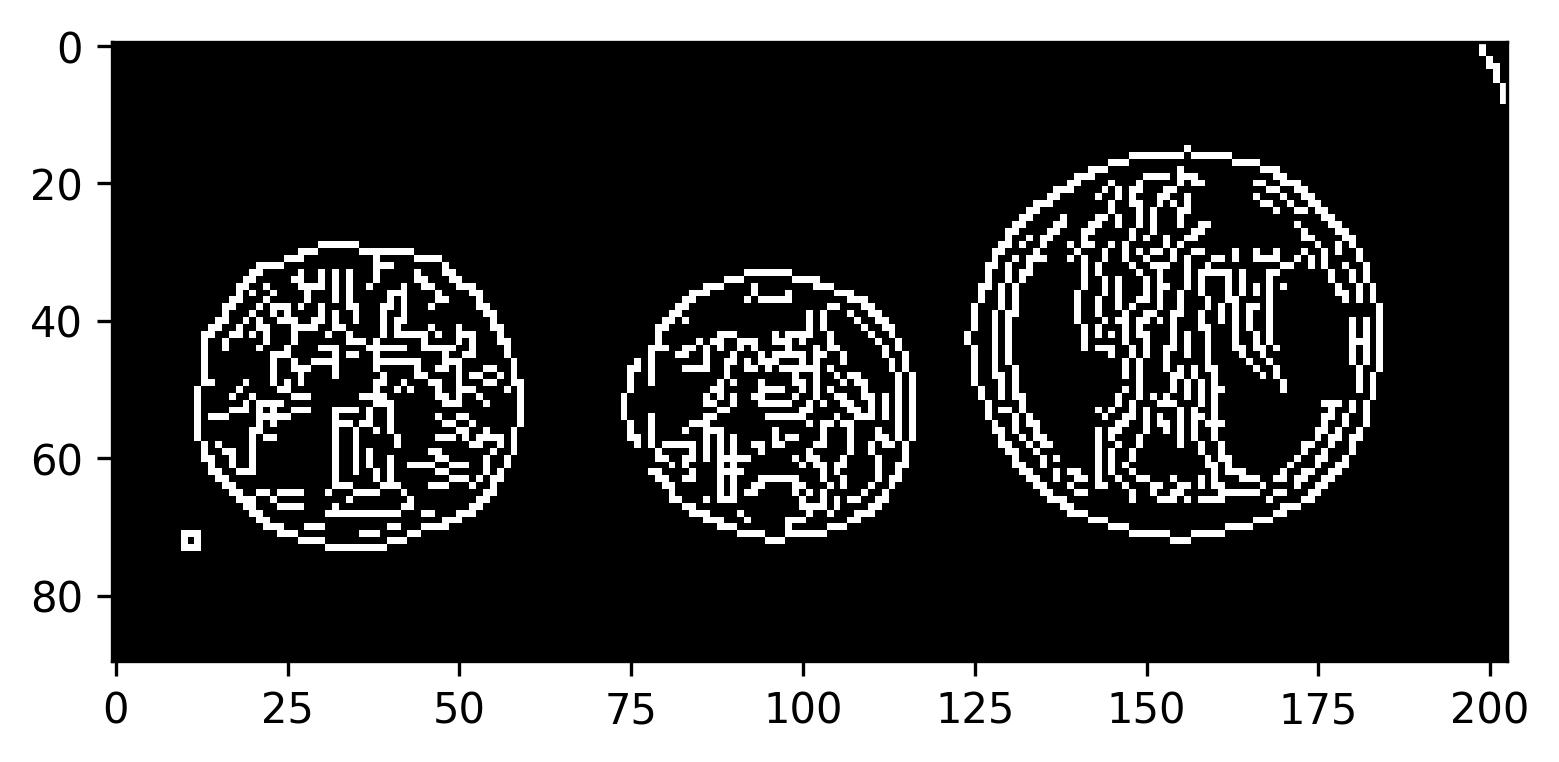

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
from skimage import data

plt.figure(dpi=300)

# Use the coins image from scikit-image
coins = data.coins()

# Get pixels 180 to the end in the X direction
x0, x1 = 180, -1
# Get pixels 0 to 90 in the Y direction 
y0, y1 = 0, 90
# Slice the image so only the top-right three coins are visible
three_coins = coins[y0:y1, x0:x1]
# scikit-image automatically guesses the thresholds, opencv does not
threshold_1, threshold_2 = 100, 200
# Apply the canny algorithm
output = cv2.Canny(three_coins, threshold_1, threshold_2)

# OpenCV's imshow() function does not work well with Jupyter so
# we use matplotlib to render to grayscale
plt.imshow(output, cmap='gray')

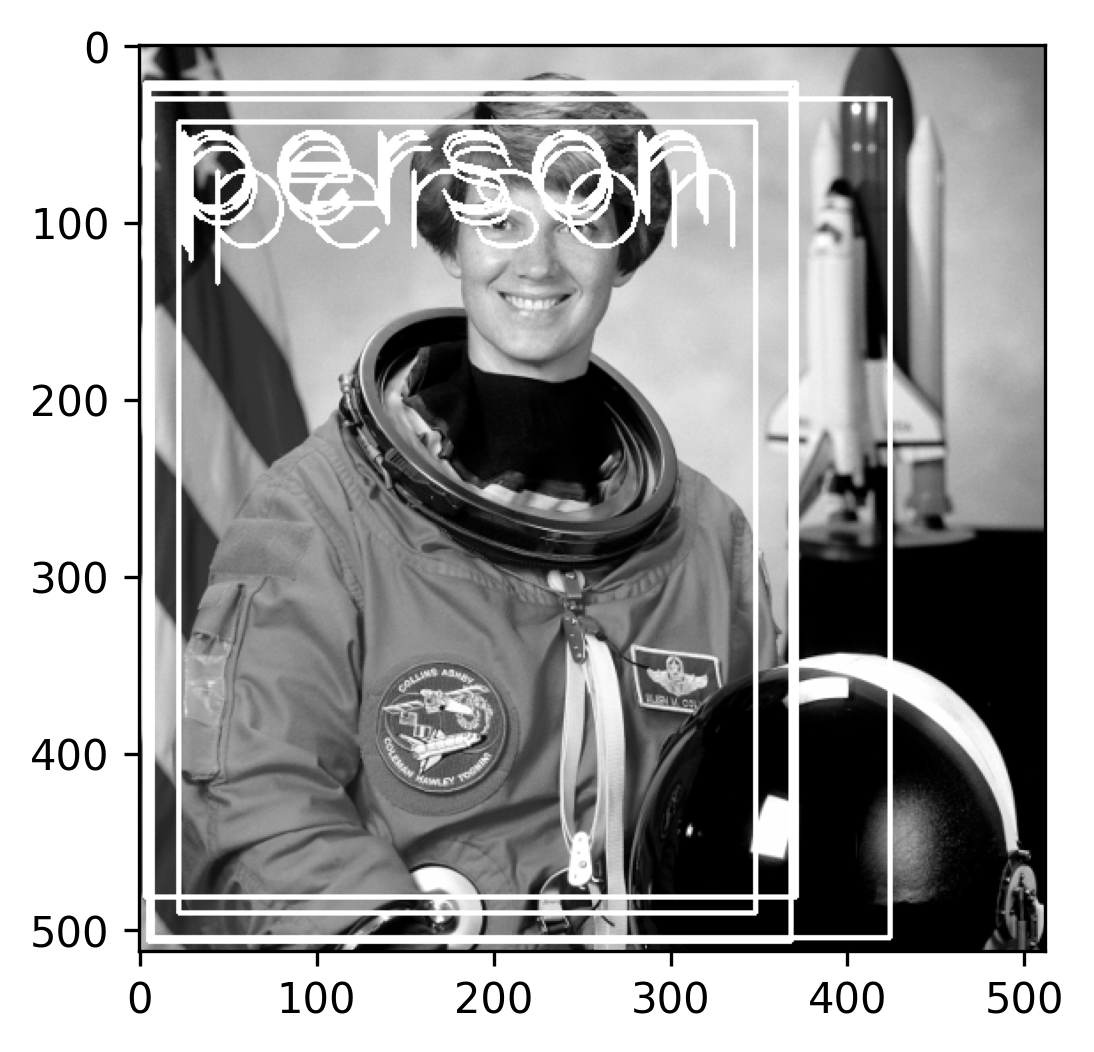

In [9]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage import data

color = 0xFF, 0xFF, 0xFF  # white
dpi = 300
font = cv.FONT_HERSHEY_SIMPLEX
font_size = 3
image_dims = 320, 320
label_offset = 10, 70
min_score = 0.9
thickness = 2

# Load the astronaut image from scikit-image as before
img = data.astronaut()
# Convert the image into a 4-dimensional blob
# by subtracting the mean and rescaling
blob = cv.dnn.blobFromImage(img, 1 / 255, size=image_dims)

# Load names of classes so we know what was detected
classes = open('coco.names').read().splitlines()
# Load the deep neural network model and configuration
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
# determine the output layer
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

# Pass the blob to the net and calculate the output blobs
net.setInput(blob)
out = net.forward(ln)
# Loop through all outputs after stacking because
# the net attempts to match multiple sizes
for result in np.vstack(out):
    # x, y, w and h are numbers between 0 and 1 and need to be
    # scaled by the width and height
    result[:4] *= img.shape[1::-1] * 2
    x, y, w, h, *scores = result
    # Search the net for the best match
    match_index = np.argmax(scores)
    # Skip questionable matches
    if scores[match_index] < min_score:
        continue

    # Calculate the top left and bottom right points
    tl = np.array([x - w / 2, y - h / 2], dtype=int)
    br = np.array([x + w / 2, y + h / 2], dtype=int)
    cv.rectangle(img, tl, br, color, thickness)
    # Calculate the point to place the text
    cv.putText(img, classes[match_index], tl + label_offset,
               font, font_size, color, thickness)
    # Stop after the first match to prevent overlapping results
    break

plt.figure(dpi=dpi)
plt.imshow(img.mean(axis=2), cmap='gray')

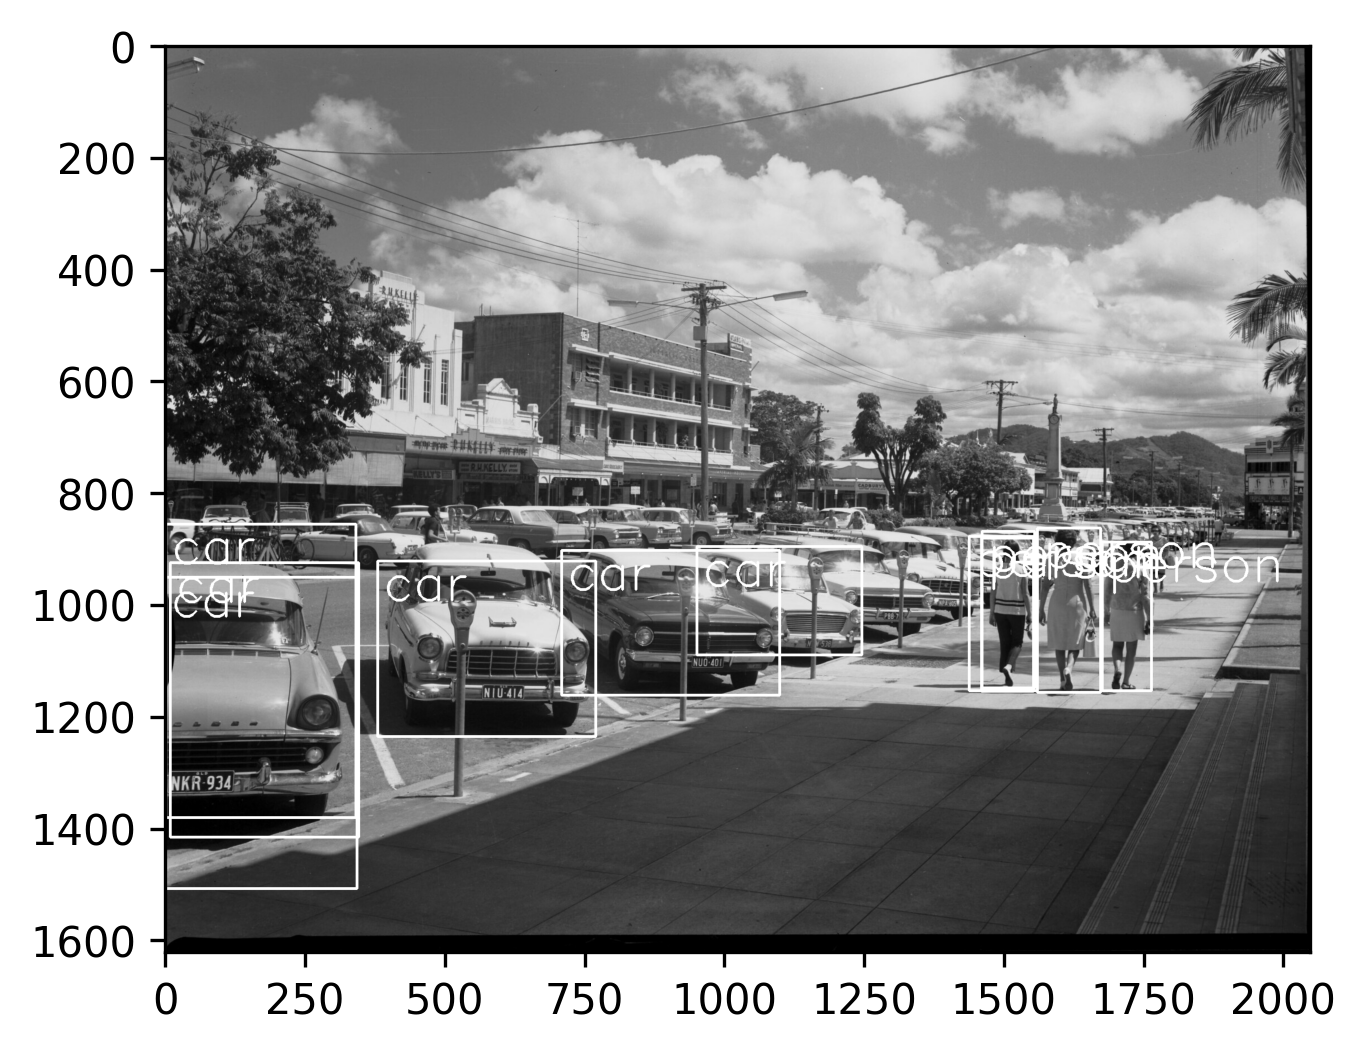

In [11]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

color = 0xFF, 0xFF, 0xFF  # white
dpi = 300
font = cv.FONT_HERSHEY_SIMPLEX
font_size = 3
image_dims = 320, 320
label_offset = 10, 70
min_score = 0.9
scale_factor = 1.2
step_ratio = 1
thickness = 3

# Load a local image and convert from BGR to RGB for matplotlib
img = cv.imread('street.jpg')
img = cv.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert the image into a 4-dimensional blob
# by subtracting the mean and rescaling
blob = cv.dnn.blobFromImage(img, 1 / 255, size=image_dims)

# Load names of classes so we know what was detected
classes = open('coco.names').read().splitlines()
# Load the deep neural network model and configuration
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
# determine the output layer
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

# Pass the blob to the net and calculate the output blobs
net.setInput(blob)
out = net.forward(ln)
# Loop through all outputs after stacking because
# the net attempts to match multiple sizes
for result in np.vstack(out):
    # x, y, w and h are numbers between 0 and 1 and need to be
    # scaled by the width and height
    result[:4] *= img.shape[1::-1] * 2
    x, y, w, h, a, *scores = result
    # Search the net for the best match
    match_index = np.argmax(scores)
    # Skip questionable matches
    if scores[match_index] < min_score:
        continue

    # Calculate the top left and bottom right points
    tl = np.array([x - w / 2, y - h / 2], dtype=int)
    br = np.array([x + w / 2, y + h / 2], dtype=int)
    cv.rectangle(img, tl, br, color, thickness)
    # Calculate the point to place the text
    pt = tl + label_offset
    cv.putText(img, classes[match_index], pt, font, font_size, color, thickness)

# For some reason matplotlib uses inches for it's sizes
plt.figure(dpi=dpi)
plt.imshow(img, cmap='gray')
